- looking at response biases, moviewise socialness
- visualize rt distributions
- plotting rt distributions across movies and per movie
- comparing RT distributions

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# setting default fontsizes for plots

s=20 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [129]:
# load data
final_data_folder = r'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/RT_online_task'
dat_all = pd.read_csv(os.path.join(final_data_folder,'RT_data_all_subs.csv'))
dat_all_full = pd.read_csv(os.path.join(final_data_folder,'RT_data_all_subs.csv'))
dat_all.head()

,Unnamed: 0,sub_ind,respDur_keys,respDur_rt,respAfter_keys,respAfter_rt,movie,date,movie_ind,consistency
0,0,86.0,left,3.070585,left,0.868510,COAXINGB0,2021-07-25_08h39.36.916,0.0,1.0
1,1,86.0,right,1.909830,right,0.669700,BILLIARDA1,2021-07-25_08h39.36.916,1.0,1.0
2,2,86.0,right,2.362310,right,0.497975,DRIFTINGA2,2021-07-25_08h39.36.916,2.0,1.0
3,3,86.0,left,4.312300,left,1.568915,FISHING3,2021-07-25_08h39.36.916,3.0,1.0
4,4,86.0,right,1.539055,right,0.667690,RANDOMMECH4,2021-07-25_08h39.36.916,4.0,1.0


In [4]:
vid_names_hcp = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical", "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]


## Preliminary checks - response bias etc.

(array([ 56.,   0.,   0.,   0.,   0.,  23.,   0.,  28.,   0., 887.]), array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]), <BarContainer object of 10 artists>)


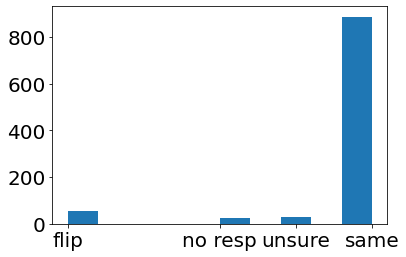

In [5]:
x = [-1,0,.5,1]
plt.xticks(x,['flip', 'no resp', 'unsure', 'same'])
y = plt.hist(dat_all['consistency'].values)

print(y) # -1(response flip):56 , 0(response missed):23, 0.5(response changed to unsure):28, 1(consistent):887

In [6]:
total = 56+23+28+887
total

994

In [7]:
print('% during-> after changed: \nflip:',100*56/1000, '%\nno resp:',100*23/1000, 
      '%\nchange to unsure:',100*28/1000, '%\nconsistent:',100*887/1000, '%')

% during-> after changed: 
flip: 5.6 %
no resp: 2.3 %
change to unsure: 2.8 %
consistent: 88.7 %


In [8]:
# left: social, right: random, down, unsure
# Response during : % of left and right responses in the "during" phase
l_resp_dur = len(np.where(dat_all['respDur_keys'].values == 'left')[0])
r_resp_dur = len(np.where(dat_all['respDur_keys'].values == 'right')[0])
print(f'left:{100*l_resp_dur/(l_resp_dur+r_resp_dur):.2f}%, right: {100*r_resp_dur/(l_resp_dur+r_resp_dur):.2f}%')
#dat_all.groupby(['respDur.keys']).count()

left:49.50%, right: 50.50%


In [9]:
# Response after: % of left, right and down responses in the "after" phase --> to compare with HCP data
l_resp_aft = len(np.where(dat_all['respAfter_keys'].values == 'left')[0])
r_resp_aft = len(np.where(dat_all['respAfter_keys'].values == 'right')[0])
d_resp_aft = len(np.where(dat_all['respAfter_keys'].values == 'down')[0])

print(f'left:{100*l_resp_aft/(l_resp_aft+r_resp_aft+d_resp_aft):.2f}%, right: {100*r_resp_aft/(l_resp_aft+r_resp_aft+d_resp_aft):.2f}%,\
     down: {100*d_resp_aft/(l_resp_aft+r_resp_aft+d_resp_aft):.2f}%')
#dat_all.groupby(['respDur.keys']).count()

left:52.83%, right: 44.28%,     down: 2.88%


In [10]:
movie_names = ['COAXINGB0','BILLIARDA1','DRIFTINGA2','FISHING3','RANDOMMECH4',
              'SCARING5', 'SEDUCINGB6', 'STARA7', 'SURPRISINGB8', 'TENNISA9']

In [11]:
dat_all.columns

Index(['Unnamed: 0', 'sub_ind', 'respDur_keys', 'respDur_rt', 'respAfter_keys',
       'respAfter_rt', 'movie', 'date', 'movie_ind', 'consistency'],
      dtype='object')

In [12]:
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [13]:
vid_names_short = np.array([str.upper(i[:4]) for i in vid_names_hcp])
vid_names_short

array(['COAX', 'BILL', 'DRIF', 'FISH', 'RAND', 'SCAR', 'SEDU', 'STAR',
       'SURP', 'TENN'], dtype='<U4')

In [14]:
hcp_socialness_sorted_names = ['SURP','COAX','SEDU','SCAR','FISH','RAND','TENN','STAR','BILL','DRIF']
hcp_socialness_sorted_ind = []
for i,m1 in enumerate(vid_names_short):
    for j,m2 in enumerate(hcp_socialness_sorted_names):
        if m1== m2:
            hcp_socialness_sorted_ind.append(j)
            break
print(hcp_socialness_sorted_ind)

[1, 8, 9, 4, 5, 3, 2, 7, 0, 6]


In [15]:
fig_save_loc = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig2_onlineRTtask'

In [16]:
subsel_data_dur = dat_all.loc[:,['movie_ind','respDur_keys','respDur_rt']].groupby(['movie_ind','respDur_keys']).count()
subsel_data_dur = subsel_data_dur.unstack(level = -1)
subsel_data_dur = subsel_data_dur.fillna(0)
subsel_data_dur['socialness_dur'] = 100*subsel_data_dur['respDur_rt']['left']/(subsel_data_dur['respDur_rt']['left'] + 
                                                            subsel_data_dur['respDur_rt']['right'])
subsel_data_dur['nonsocialness_dur'] = 100*subsel_data_dur['respDur_rt']['right']/(subsel_data_dur['respDur_rt']['left'] + 
                                                            subsel_data_dur['respDur_rt']['right'])
subsel_data_dur['socialness_rank_hcp'] = hcp_socialness_sorted_ind
#subsel_data_dur = subsel_data_dur.sort_values(by='socialness_dur')
subsel_data_dur = subsel_data_dur.sort_values(by='socialness_rank_hcp',ascending=False)
subsel_data_dur

respDur_rt       socialness_dur nonsocialness_dur  \
respDur_keys       left right                                    
movie_ind                                                        
2.0                   4    95       4.040404         95.959596   
1.0                   2    98       2.000000         98.000000   
7.0                   6    94       6.000000         94.000000   
9.0                   8    91       8.080808         91.919192   
4.0                  10    89      10.101010         89.898990   
3.0                  91     8      91.919192          8.080808   
5.0                  81    17      82.653061         17.346939   
6.0                  98     2      98.000000          2.000000   
0.0                  96     4      96.000000          4.000000   
8.0                  96     4      96.000000          4.000000   

             socialness_rank_hcp  
respDur_keys                      
movie_ind                         
2.0                            9  
1.0                            8  
7.0                            7  
9.0                            6  
4.0                            5  
3.0                            4  
5.0                            3  
6.0                            2  
0.0                            1  
8.0                            0

In [17]:
#vid_movie_ticks = [str.upper(vid_joined[i].split('-')[0]) for i in counts.index]
#vid_movie_ticks[4] = 'RAND MECH'
#vid_movie_ticks

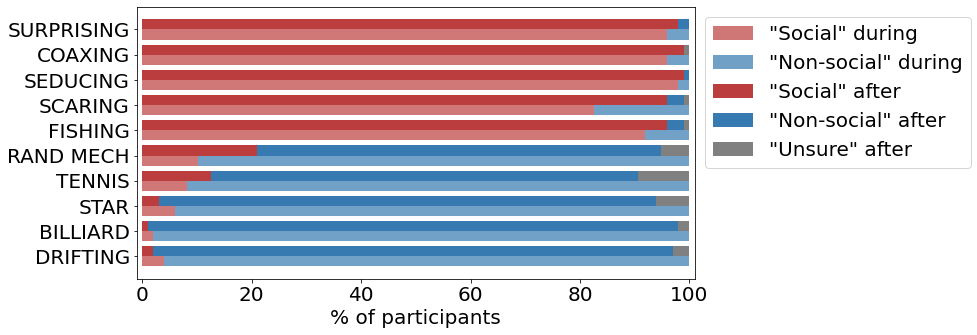

In [18]:
# plot mean socialness
#during
#plt.figure(1,figsize=(10,5))
def figure_1S_a(ax):
    subsel_data_dur = dat_all.loc[:,['movie_ind','respDur_keys','respDur_rt']].groupby(['movie_ind','respDur_keys']).count()
    subsel_data_dur = subsel_data_dur.unstack(level = -1)
    subsel_data_dur = subsel_data_dur.fillna(0)
    subsel_data_dur['socialness_dur'] = 100*subsel_data_dur['respDur_rt']['left']/(subsel_data_dur['respDur_rt']['left'] + 
                                                                subsel_data_dur['respDur_rt']['right'])
    subsel_data_dur['nonsocialness_dur'] = 100*subsel_data_dur['respDur_rt']['right']/(subsel_data_dur['respDur_rt']['left'] + 
                                                                subsel_data_dur['respDur_rt']['right'])
    subsel_data_dur['socialness_rank_hcp'] = hcp_socialness_sorted_ind
    #subsel_data_dur = subsel_data_dur.sort_values(by='socialness_dur')
    subsel_data_dur = subsel_data_dur.sort_values(by='socialness_rank_hcp',ascending=False)
    ax.barh(range(10),subsel_data_dur['socialness_dur'].values,color = red_rgb, align='edge', height = -.4, label='"Social" during', alpha=.7)
    ax.barh(range(10),subsel_data_dur['nonsocialness_dur'].values,left=subsel_data_dur['socialness_dur'].values,color = blue_rgb, align='edge', height = -.4, label='"Non-social" during', alpha=.7)
    #lbls = [str.upper(i[:4]) for i in movie_names]
    lbls=[]
    for i in subsel_data_dur.index:
        m = str.upper(movie_names[int(i)])
        if ('FISH' in m) | ('SCAR' in m):
            lbls.append(m[:-1])
        elif ('RAND' in m):
            lbls.append('RAND MECH')
        else:
            lbls.append(m[:-2])
        
    #plt.xticks(subsel_data.index)
    plt.yticks(np.arange(10),lbls, rotation = 0)
    #plt.ylim(.7,1)

    #after
    subsel_data_aft = dat_all.loc[:,['movie_ind','respAfter_keys','respAfter_rt']].groupby(['movie_ind','respAfter_keys']).count()
    subsel_data_aft = subsel_data_aft.unstack(level = -1)
    subsel_data_aft = subsel_data_aft.fillna(0)
    subsel_data_aft['socialness_aft'] = 100*subsel_data_aft['respAfter_rt']['left']/(subsel_data_aft['respAfter_rt']['left'] + 
                                                                subsel_data_aft['respAfter_rt']['right'] + subsel_data_aft['respAfter_rt']['down'])
    subsel_data_aft['nonsocialness_aft'] = 100*subsel_data_aft['respAfter_rt']['right']/(subsel_data_aft['respAfter_rt']['left'] + 
                                                                subsel_data_aft['respAfter_rt']['right'] + subsel_data_aft['respAfter_rt']['down'])
    subsel_data_aft['unsure_aft'] = 100*subsel_data_aft['respAfter_rt']['down']/(subsel_data_aft['respAfter_rt']['left'] + 
                                                                subsel_data_aft['respAfter_rt']['right'] + subsel_data_aft['respAfter_rt']['down'])                                                            
    #subsel_data_aft['socialness_dur'] = subsel_data_dur['socialness_dur']
    #subsel_data_aft = subsel_data_aft.sort_values(by='socialness_dur')

    subsel_data_aft['socialness_rank_hcp'] = hcp_socialness_sorted_ind
    subsel_data_aft = subsel_data_aft.sort_values(by='socialness_rank_hcp',ascending=False)

    plt.barh(range(10),subsel_data_aft['socialness_aft'].values,color= red_rgb, align='edge', height = .4, label='"Social" after')
    plt.barh(range(10),subsel_data_aft['nonsocialness_aft'].values,left=subsel_data_aft['socialness_aft'].values,color = blue_rgb, align='edge', height = .4, label='"Non-social" after')
    plt.barh(range(10),subsel_data_aft['unsure_aft'].values,left=(subsel_data_aft['socialness_aft'].values+subsel_data_aft['nonsocialness_aft'].values),color = 'grey', align='edge', height = .4, label='"Unsure" after')
    #lbls = [str.upper(i[:4]) for i in movie_names]

    #plt.xticks(subsel_data.index)
    plt.xlim(-1,101)
    #plt.title('Socialness per movie after', fontweight = 'bold')
    ax.legend(bbox_to_anchor=[1,1])#,fontsize=20)
    ax.set_xlabel('% of participants',fontsize=20)
    #ax.set_title('Response time (sec) during/after each movie', fontweight = 'bold',fontsize=16)
    #ax.set_title('Number of responses during/after each movie', fontweight = 'bold',fontsize=16)

fig = plt.figure(1,figsize=(10,5))
ax = fig.add_subplot(111)
figure_1S_a(ax) # Fig 2a in the final version
plt.savefig(os.path.join(fig_save_loc,'fig1S_nr_of_responses.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


Text(0.5, 1.0, 'Unanimity in the sample during')

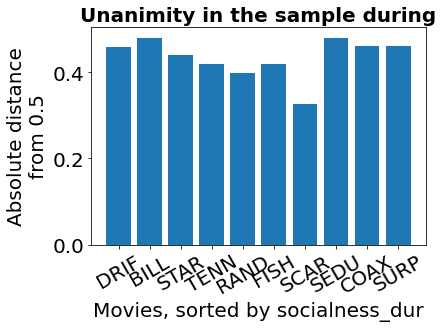

In [19]:
# plot certainty/unanimity in perception
subsel_data_dur['unanimity'] = np.abs(0.5-subsel_data_dur['socialness_dur']/100)
plt.bar(range(10),subsel_data_dur['unanimity'].values)
lbls = [str.upper(i[:4]) for i in movie_names]
plt.xticks(np.arange(10),[str.upper(movie_names[int(i)][:4]) for i in subsel_data_dur.index], rotation = 30)
#plt.ylim(.7,1)
plt.xlabel('')
plt.ylabel('Absolute distance\nfrom 0.5')
plt.xlabel('Movies, sorted by socialness_dur')
plt.title('Unanimity in the sample during', fontweight = 'bold')

- above: Another way of presenting earlier data: most ambiguous movies are halfway between extreme social or nonsocial.

In [20]:
mat = dat_all.groupby(['movie_ind','consistency']).count().unstack(level=-1)
print(mat)
mat['respDur_keys'][1.0].values # consistent

            Unnamed: 0                 sub_ind                 respDur_keys  \
consistency       -1.0  0.0  0.5   1.0    -1.0  0.0  0.5   1.0         -1.0   
movie_ind                                                                     
0.0                3.0  3.0  1.0  93.0     3.0  3.0  1.0  93.0          3.0   
1.0                1.0  3.0  2.0  94.0     1.0  3.0  2.0  94.0          1.0   
2.0                2.0  NaN  3.0  94.0     2.0  NaN  3.0  94.0          2.0   
3.0                7.0  2.0  1.0  89.0     7.0  2.0  1.0  89.0          7.0   
4.0               13.0  4.0  5.0  77.0    13.0  4.0  5.0  77.0         13.0   
5.0               17.0  2.0  1.0  78.0    17.0  2.0  1.0  78.0         17.0   
6.0                1.0  NaN  NaN  99.0     1.0  NaN  NaN  99.0          1.0   
7.0                2.0  3.0  6.0  89.0     2.0  3.0  6.0  89.0          2.0   
8.0                3.0  3.0  NaN  94.0     3.0  3.0  NaN  94.0          3.0   
9.0                7.0  3.0  9.0  80.0     7.0  3.0 

array([93., 94., 94., 89., 77., 78., 99., 89., 94., 80.])

In [21]:
moviewise_cons = mat['respDur_keys'][1.0].values # consistent
total_subs_per_movie = np.nansum(mat['respDur_keys'].values, axis =1) #both consistent and inconsistent
total_subs_per_movie

array([100., 100.,  99.,  99.,  99.,  98., 100., 100., 100.,  99.])

Consistency, i.e., fraction of trials with "during = after":  89.2354124748491


Text(0.5, 1.0, 'During-After response consistency')

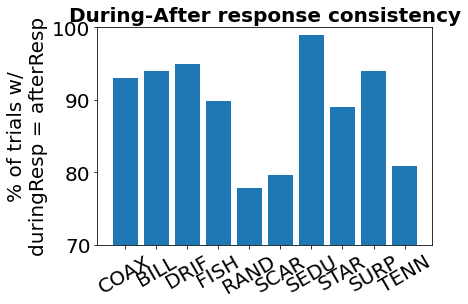

In [22]:
# consistency: fraction of trials where response during = response after
ncons = len(np.where(dat_all['consistency'] == 1)[0])
pc_consistency_all = 100*ncons/dat_all.shape[0]
print('Consistency, i.e., fraction of trials with "during = after": ', pc_consistency_all)

mat = dat_all.groupby(['movie_ind','consistency']).count().unstack(level=-1)
moviewise_cons = mat['respDur_keys'][1.0].values
total_subs_per_movie = np.nansum(mat['respDur_keys'].values, axis =1)
plt.bar(range(10),100*np.divide(moviewise_cons,total_subs_per_movie))
lbls = [str.upper(i[:4]) for i in movie_names]
plt.xticks(np.arange(10),lbls, rotation = 30)
plt.ylim(70,100)
plt.xlabel('')
plt.ylabel('% of trials w/\nduringResp = afterResp')
plt.title('During-After response consistency', fontweight = 'bold')


- Looks like some of our generally ambiguous movies (random mech, tennis etc.) also show less during-after consistency - suggesting evidence accumulation even after an early decision making during.

In [24]:
#before removing inconsistent responses, coaxing (CHECKING)
dat_all.loc[dat_all['movie_ind']==0,:].groupby(['respDur_keys','consistency']).count()

Unnamed: 0  sub_ind  respDur_rt  respAfter_keys  \
respDur_keys consistency                                                    
left          0.0                  2        2           2               0   
              0.5                  1        1           1               1   
              1.0                 93       93          93              93   
right        -1.0                  3        3           3               3   
              0.0                  1        1           1               0   

                          respAfter_rt  movie  date  movie_ind  
respDur_keys consistency                                        
left          0.0                    0      2     2          2  
              0.5                    1      1     1          1  
              1.0                   93     93    93         93  
right        -1.0                    3      3     3          3  
              0.0                    0      1     1          1

In [25]:
#pop_response = ['left','right','left'] # popular response for 3 movies of interest
#movie_inds = [0,1,6]
#for i in range(3):
#    print(dat_all.loc[(dat_all['movie']==movie_names[movie_inds[i]])&(dat_all['respDur_keys']==pop_response[i]),'respDur_rt'].mean(skipna=True))

In [26]:
# trying to understand some inconsistencies in reporting the coax-bill median and sem rt in the paper.
# Was this including some inconsistent responses or bad subs?
# Run ONLY if needed
# Visualising median RT during and after for each movie based on responses
print('\nMedian RT per movie (note:there were very few responses in the nondominant category):')
print(dat_all.groupby(['movie_ind','respDur_keys']).median().loc[:,['respDur_rt','respAfter_rt']])

# Visualising median RT during and after for each movie based on responses
print('\nSEM RT per movie (note:there were very few responses in the nondominant category):')
dat_all.groupby(['movie_ind','respDur_keys']).sem().loc[:,['respDur_rt','respAfter_rt']]

# clarified; these SEMs were reported in the paper!


Median RT per movie (note:there were very few responses in the nondominant category):
                        respDur_rt  respAfter_rt
movie_ind respDur_keys                          
0.0       left             3.46667      0.861905
          right            4.65145      0.548600
1.0       left             7.66750      0.592600
          right            3.80850      0.698700
2.0       left            10.85820      0.723950
          right            5.36690      0.706500
3.0       left             6.36350      0.893100
          right            9.30460      0.772047
4.0       left            13.87245      1.051450
          right            5.62900      0.851100
5.0       left            10.03500      0.767350
          right            8.26450      0.609600
6.0       left             5.09975      0.613050
          right            2.58425      0.765100
7.0       left             9.06800      0.497950
          right            5.10090      0.622500
8.0       left             6.05

respDur_rt  respAfter_rt
movie_ind respDur_keys                          
0.0       left            0.248316      0.053104
          right           1.908425      0.300074
1.0       left            1.874300      0.045100
          right           0.263924      0.054393
2.0       left            0.425447      0.555435
          right           0.383892      0.056032
3.0       left            0.387884      0.051894
          right           1.682393      0.175711
4.0       left            1.495996      0.230890
          right           0.458823      0.056886
5.0       left            0.522265      0.044507
          right           0.758568      0.062443
6.0       left            0.255915      0.042641
          right           0.371250      0.237900
7.0       left            2.537832      0.269801
          right           0.286312      0.042745
8.0       left            0.292309      0.037513
          right           1.968728      0.185583
9.0       left            1.356928      0.167248
          right           0.329482      0.045715

In [27]:
# remove trials with different during-after responses 
# note: during != after can also be due to a missed or unsure response, not just flipping opinion!!!
# best to not interpret inconsistent trials unless the flip is from Yes to No
dat_all= dat_all.loc[dat_all['consistency']==1,:]
dat_all.shape

(887, 10)

In [28]:
#after removing inconsistent responses. movie coaxing  (CHECKING)
dat_all.loc[dat_all['movie_ind']==0,:].groupby(['respDur_keys','consistency']).count() 
# no right-right responses for coaxing

,,Unnamed: 0,sub_ind,respDur_rt,respAfter_keys,respAfter_rt,movie,date,movie_ind
respDur_keys,consistency,,,,,,,,
left,1.0,93,93,93,93,93,93,93,93


In [29]:
# getting response times for three movies of interest
#pop_response = ['left','right','left']
#movie_inds = [0,1,6]
#for i in range(3):
#    print(dat_all.loc[(dat_all['movie']==movie_names[movie_inds[i]])&(dat_all['respDur_keys']==pop_response[i]),'respDur_rt'].mean(skipna=True))

In [30]:
# trying to understand some inconsistencies in reporting the coax-bill median and sem rt in the paper.
# Was this including some inconsistent responses or bad subs?
# Run ONLY if needed
# Visualising median RT during and after for each movie based on responses
print('\nMedian RT per movie (note:there were very few responses in the nondominant category):')
print(dat_all.groupby(['movie_ind','respDur_keys']).median().loc[:,['respDur_rt','respAfter_rt']])

# Visualising median RT during and after for each movie based on responses
print('\nSEM RT per movie (note:there were very few responses in the nondominant category):')
dat_all.groupby(['movie_ind','respDur_keys']).sem().loc[:,['respDur_rt','respAfter_rt']]


Median RT per movie (note:there were very few responses in the nondominant category):
                        respDur_rt  respAfter_rt
movie_ind respDur_keys                          
0.0       left            3.453340      0.855300
1.0       left            9.541800      0.637700
          right           3.749000      0.698700
2.0       left           11.183050      0.723950
          right           5.311250      0.703550
3.0       left            6.317600      0.900000
          right          14.475855      1.110347
4.0       left           13.872450      1.051450
          right           6.019700      0.855600
5.0       left           10.187700      0.767900
          right           8.264500      1.134300
6.0       left            5.099750      0.613050
          right           2.213000      1.003000
7.0       left           13.901650      0.497950
          right           5.130000      0.604500
8.0       left            6.088900      0.756400
          right          10.807

respDur_rt  respAfter_rt
movie_ind respDur_keys                          
0.0       left            0.252540      0.052933
1.0       left                 NaN           NaN
          right           0.228237      0.051404
2.0       left            0.088450      0.242750
          right           0.369130      0.056382
3.0       left            0.379568      0.052818
          right           4.668345      0.274853
4.0       left            1.330948      0.281234
          right           0.556667      0.059467
5.0       left            0.533663      0.041439
          right                NaN           NaN
6.0       left            0.255915      0.042641
          right                NaN           NaN
7.0       left            0.591250      0.158050
          right           0.257233      0.041904
8.0       left            0.292942      0.037903
          right                NaN           NaN
9.0       left            2.038148      0.231313
          right           0.373908      0.052232

In [31]:
dat_all.shape

(887, 10)

In [32]:
thresh = 8 # good subs threshold
trial_counts = dat_all.groupby("sub_ind").count()["movie_ind"]
bad_subs = trial_counts[(trial_counts < thresh)].index
#print(bad_subs)
dat_all = dat_all.set_index('sub_ind') # make subj_idx the index
dat_all.drop(bad_subs, inplace=True) # remove bad subjects
dat_all = dat_all.reset_index() #bring back subj_idx as a column

print("Nr. of subjects left",len(dat_all.groupby("sub_ind")))
print("Nr. of rows:",dat_all.shape)

Nr. of subjects left 90
Nr. of rows: (821, 10)


In [33]:
nresponses = dat_all.groupby('sub_ind').count().iloc[:,0].values
for tot in [8,9,10]:
    print(f"nsubs with {tot} responses in all {len(np.where(nresponses == tot)[0])}")

nsubs with 8 responses in all 23
nsubs with 9 responses in all 33
nsubs with 10 responses in all 34


In [35]:
rows = dat_all['movie_ind'] <=1
dat_coaxbill = dat_all.loc[rows,:]
nresponses_coaxbill = dat_coaxbill.groupby('sub_ind').count().iloc[:,0].values
for tot in [0,1,2]:
    print(f"nsubs with {tot} responses in all {len(np.where(nresponses_coaxbill == tot)[0])}")

nsubs with 0 responses in all 0
nsubs with 1 responses in all 6
nsubs with 2 responses in all 84


In [219]:
# distribution of left and right responses for each movie
dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1)

respDur_keys,left,right
movie_ind,,
0.0,86.0,NaN
1.0,1.0,87.0
2.0,NaN,89.0
3.0,80.0,2.0
4.0,6.0,66.0
5.0,72.0,1.0
6.0,89.0,NaN
7.0,2.0,82.0
8.0,83.0,1.0


In [100]:
acc = []

for i,row in dat_coaxbill.iterrows():
    if (row['respAfter_keys'] == 'left'): # & (row['respDur_keys'] == 'left'):
        if row['movie_ind'] == 0:
            acc.append(1)
        else:
            acc.append(0)
    
    if (row['respAfter_keys'] == 'right'): #& (row['respDur_keys'] == 'right'):
        if row['movie_ind'] == 0:
            acc.append(0)
        else:
            acc.append(1)
dat_coaxbill['acc'] = acc

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


87

In [117]:
x = dat_coaxbill.loc[(dat_coaxbill['acc']==1),:].groupby(['sub_ind']).count().iloc[:,0].values
(np.where(x==1)[0]), len(np.where(x==2)[0]) # sub inds with 1 "correct" and 2 "correct" responses, resp.

(array([ 0,  9, 39, 66, 80, 84, 89]), 83)

In [118]:
x = dat_coaxbill.loc[(dat_coaxbill['consistency']==1),:].groupby(['sub_ind']).count().iloc[:,0].values
(np.where(x==1)[0]), len(np.where(x==2)[0])  # sub inds with 1 consistent and 2 consistent responses, resp.

(array([ 0, 39, 66, 80, 84, 89]), 84)

In [113]:
dat_coaxbill.loc[(dat_coaxbill['acc']==1),:].groupby(['sub_ind']).count().iloc[:,0].index[9] # ind of the subject with 2 consistent responses, but only 1 "correct" response

10.0

In [116]:
dat_coaxbill.loc[dat_coaxbill['sub_ind'] ==10,:] # checking responses for sub_ind 10 - they reported BILLIARD as "Social"

,sub_ind,Unnamed: 0,respDur_keys,respDur_rt,respAfter_keys,respAfter_rt,movie,date,movie_ind,consistency,acc
10,10.0,10,left,2.6565,left,0.3983,COAXINGB0,2021-07-25_14h56.09.793,0.0,1.0,1
11,10.0,11,left,9.5418,left,0.6377,BILLIARDA1,2021-07-25_14h56.09.793,1.0,1.0,0


In [128]:
for i in [ 0,  9, 39, 66, 80, 84, 89]:
    sub_ind = dat_coaxbill.loc[(dat_coaxbill['acc']==1),:].groupby(['sub_ind']).count().iloc[:,0].index[i] 
    print('\nsub:', dat_coaxbill.loc[dat_coaxbill['sub_ind'] ==sub_ind,['sub_ind','respDur_keys','respAfter_keys','consistency','acc']]) # checking responses for sub_ind 10 - they reported BILLIARD as "Social")


sub:      sub_ind respDur_keys respAfter_keys  consistency  acc
767      0.0        right          right          1.0    1

sub:     sub_ind respDur_keys respAfter_keys  consistency  acc
10     10.0         left           left          1.0    1
11     10.0         left           left          1.0    0

sub:      sub_ind respDur_keys respAfter_keys  consistency  acc
604     46.0        right          right          1.0    1

sub:      sub_ind respDur_keys respAfter_keys  consistency  acc
131     75.0         left           left          1.0    1

sub:      sub_ind respDur_keys respAfter_keys  consistency  acc
578     90.0         left           left          1.0    1

sub:      sub_ind respDur_keys respAfter_keys  consistency  acc
638     94.0        right          right          1.0    1

sub:     sub_ind respDur_keys respAfter_keys  consistency  acc
96     99.0        right          right          1.0    1


In [171]:
dat_coax = dat_coaxbill.loc[(dat_coaxbill['movie_ind']==0) & (dat_coaxbill['consistency']==1),:]
dat_bill = dat_coaxbill.loc[(dat_coaxbill['movie_ind']==1) & (dat_coaxbill['consistency']==1),:]
dat_coaxbill_sideways = dat_coax.merge(dat_bill, how = 'inner', on = 'sub_ind')
dat_coaxbill_sideways

,sub_ind,Unnamed: 0_x,respDur_keys_x,respDur_rt_x,respAfter_keys_x,respAfter_rt_x,movie_x,date_x,movie_ind_x,consistency_x,...,Unnamed: 0_y,respDur_keys_y,respDur_rt_y,respAfter_keys_y,respAfter_rt_y,movie_y,date_y,movie_ind_y,consistency_y,acc_y
0,86.0,0,left,3.070585,left,0.86851,COAXINGB0,2021-07-25_08h39.36.916,0.0,1.0,...,1,right,1.90983,right,0.669700,BILLIARDA1,2021-07-25_08h39.36.916,1.0,1.0,1
1,10.0,10,left,2.656500,left,0.39830,COAXINGB0,2021-07-25_14h56.09.793,0.0,1.0,...,11,left,9.54180,left,0.637700,BILLIARDA1,2021-07-25_14h56.09.793,1.0,1.0,0
2,39.0,30,left,3.072100,left,0.31040,COAXINGB0,2021-07-25_14h37.25.903,0.0,1.0,...,31,right,1.48970,right,0.238900,BILLIARDA1,2021-07-25_14h37.25.903,1.0,1.0,1
3,47.0,40,left,2.865100,left,0.62790,COAXINGB0,2021-07-25_14h54.05.867,0.0,1.0,...,41,right,2.78050,right,1.091000,BILLIARDA1,2021-07-25_14h54.05.867,1.0,1.0,1
4,31.0,50,left,3.453340,left,1.26579,COAXINGB0,2021-07-25_08h52.20.361,0.0,1.0,...,51,right,2.67928,right,0.700595,BILLIARDA1,2021-07-25_08h52.20.361,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,32.0,960,left,3.379000,left,0.60300,COAXINGB0,2021-07-25_06h52.13.337,0.0,1.0,...,961,right,3.69900,right,0.536000,BILLIARDA1,2021-07-25_06h52.13.337,1.0,1.0,1
80,14.0,970,left,5.250400,left,1.00100,COAXINGB0,2021-07-25_09h51.36.290,0.0,1.0,...,971,right,5.72450,right,1.035600,BILLIARDA1,2021-07-25_09h51.36.290,1.0,1.0,1
81,78.0,980,left,4.643200,left,0.38530,COAXINGB0,2021-07-25_14h55.23.086,0.0,1.0,...,981,right,4.06800,right,0.416900,BILLIARDA1,2021-07-25_14h55.23.086,1.0,1.0,1
82,9.0,990,left,8.183700,left,2.36050,COAXINGB0,2021-07-25_14h57.00.228,0.0,1.0,...,991,right,7.15560,right,1.811000,BILLIARDA1,2021-07-25_14h57.00.228,1.0,1.0,1


In [174]:
print('coax-social:', len(np.where(dat_coaxbill_sideways['respDur_keys_x'] =='left')[0]))
print('coax-nonsocial:', len(np.where(dat_coaxbill_sideways['respDur_keys_x'] =='right')[0]))
print('bill-social:', len(np.where(dat_coaxbill_sideways['respDur_keys_y'] =='left')[0]))
print('bill-nonsocial:', len(np.where(dat_coaxbill_sideways['respDur_keys_y'] =='right')[0]))

coax-social: 84
coax-nonsocial: 0
bill-social: 1
bill-nonsocial: 83


In [175]:
# McNemar's test looking at group-wise trends

def return_len(inp):
    return len(np.where(inp)[0])

def run_mcnemar(data):
    # source: https://towardsdatascience.com/mcnemars-test-to-evaluate-machine-learning-classifiers-with-python-9f26191e1a6b and 
    # https://gist.github.com/March-08/ba49d2ed1150bc0a135294c0489f4c1c#file-mcnemar_test-py
    # Import library
    from statsmodels.stats.contingency_tables import mcnemar
    
    # Create a dataset
    #data = [[9, 37], [16, 82]]
    print(data)


    threshold = 3.841 
    significance_value = 0.05

    # McNemar's Test with the continuity correction
    #test = mcnemar(data, exact=False, correction=True) # either exact or correction needed for small samples
    test = mcnemar(data, exact=True, correction=False)

    if test.pvalue < significance_value:
        print("Reject Null hypotesis")
    else:
        print("Fail to reject Null hypotesis")

    #or equivalently
    if test.statistic > threshold:
        print("Reject Null hypotesis")
    else:
        print("Fail to reject Null hypotesis")

    return data, test


'''subs_nonan = ~np.isnan(responses[:,0]) & ~np.isnan(responses[:,1]) # including unsure
coax_div = np.array([len(np.where(responses[subs_nonan,0]==1)[0]), len(np.where(responses[subs_nonan,0]==0)[0]), len(np.where(responses[subs_nonan,0]==9)[0])])
bill_div = np.array([len(np.where(responses[subs_nonan,1]==1)[0]), len(np.where(responses[subs_nonan,1]==0)[0]), len(np.where(responses[subs_nonan,1]==9)[0])])
bill_div = bill_div[[1,0,2]]

#print(len(np.where(subs_nonan)[0]), coax_div, bill_div)
coax_bill_resp  = responses[subs_nonan,:2]
coax_vals =  {'dom': 1, 'nondom': [0,9]}
bill_vals =  {'dom': 0, 'nondom': [1,9]}
comp_type = 'dom_nondom' #'s_ns'  #  'dom_nondom'
print('\n', comp_type)
data, results = run_mcnemar(coax_bill_resp, coax_vals, bill_vals,  comp_type)
print(results) #chisquare statistic if exact is false

#print(len(np.where(subs_nonan)[0]), coax_div, bill_div)
coax_bill_resp  = responses[subs_nonan,:2]
coax_vals =  {'dom': 1, 'nondom': [0,9]}
bill_vals =  {'dom': 0, 'nondom': [1,9]}
comp_type = 's_ns'  #  'dom_nondom'
print('\n', comp_type)
data, results = run_mcnemar(coax_bill_resp, coax_vals, bill_vals,  comp_type)
print(results) # chisquare statistic if exact is false'''

'''b = 6#14
c = 16#59
(np.abs(b-c)-1)**2/(b+c)'''

data = [[0,1],[0,83]]
d,t = run_mcnemar(data)
print(t)

[[0, 1], [0, 83]]
Fail to reject Null hypotesis
Fail to reject Null hypotesis
pvalue      1.0
statistic   0.0


In [165]:
dat_all_coax = dat_all_full.loc[(dat_all_full['movie_ind']==0) & (dat_all_full['consistency']==1),:]
dat_all_bill = dat_all_full.loc[(dat_all_full['movie_ind']==1) & (dat_all_full['consistency']==1),:]
dat_coaxbill_sideways = dat_all_coax.merge(dat_all_bill, how = 'inner', on = 'sub_ind')
dat_coaxbill_sideways

,Unnamed: 0_x,sub_ind,respDur_keys_x,respDur_rt_x,respAfter_keys_x,respAfter_rt_x,movie_x,date_x,movie_ind_x,consistency_x,Unnamed: 0_y,respDur_keys_y,respDur_rt_y,respAfter_keys_y,respAfter_rt_y,movie_y,date_y,movie_ind_y,consistency_y
0,0,86.0,left,3.070585,left,0.86851,COAXINGB0,2021-07-25_08h39.36.916,0.0,1.0,1,right,1.90983,right,0.6697,BILLIARDA1,2021-07-25_08h39.36.916,1.0,1.0
1,10,10.0,left,2.656500,left,0.39830,COAXINGB0,2021-07-25_14h56.09.793,0.0,1.0,11,left,9.54180,left,0.6377,BILLIARDA1,2021-07-25_14h56.09.793,1.0,1.0
2,20,23.0,left,3.052000,left,1.75900,COAXINGB0,2021-07-25_09h54.48.232,0.0,1.0,21,right,1.77300,right,0.4830,BILLIARDA1,2021-07-25_09h54.48.232,1.0,1.0
3,30,39.0,left,3.072100,left,0.31040,COAXINGB0,2021-07-25_14h37.25.903,0.0,1.0,31,right,1.48970,right,0.2389,BILLIARDA1,2021-07-25_14h37.25.903,1.0,1.0
4,40,47.0,left,2.865100,left,0.62790,COAXINGB0,2021-07-25_14h54.05.867,0.0,1.0,41,right,2.78050,right,1.0910,BILLIARDA1,2021-07-25_14h54.05.867,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,960,32.0,left,3.379000,left,0.60300,COAXINGB0,2021-07-25_06h52.13.337,0.0,1.0,961,right,3.69900,right,0.5360,BILLIARDA1,2021-07-25_06h52.13.337,1.0,1.0
85,970,14.0,left,5.250400,left,1.00100,COAXINGB0,2021-07-25_09h51.36.290,0.0,1.0,971,right,5.72450,right,1.0356,BILLIARDA1,2021-07-25_09h51.36.290,1.0,1.0
86,980,78.0,left,4.643200,left,0.38530,COAXINGB0,2021-07-25_14h55.23.086,0.0,1.0,981,right,4.06800,right,0.4169,BILLIARDA1,2021-07-25_14h55.23.086,1.0,1.0
87,990,9.0,left,8.183700,left,2.36050,COAXINGB0,2021-07-25_14h57.00.228,0.0,1.0,991,right,7.15560,right,1.8110,BILLIARDA1,2021-07-25_14h57.00.228,1.0,1.0


89

In [157]:
for i in ['left', 'right']:
    for j in ['right', 'left']:
        print('coax',i, ', bill', j, ':', len(np.where((dat_coaxbill_sideways['respDur_keys_x']==i) & (dat_coaxbill_sideways['respDur_keys_y']==j))[0]))

coax left , bill right : 88
coax left , bill left : 1
coax right , bill right : 0
coax right , bill left : 0


In [163]:
data = np.array([[0,0],[1,88]])
d,t = run_mcnemar(data)
print(t)

[[ 0  0]
 [ 1 88]]
Fail to reject Null hypotesis
Fail to reject Null hypotesis
pvalue      1.0
statistic   0.0


In [148]:
len(np.unique(dat_all_full.loc[(dat_all_full['movie_ind']<2)&(dat_all_full['consistency']==1),:].groupby(['sub_ind','movie_ind','respDur_keys']).count().reset_index().sub_ind.values))

98

In [149]:
subs = np.unique(dat_all_full.loc[(dat_all_full['movie_ind']<2)&(dat_all_full['consistency']==1),:].groupby(['sub_ind','movie_ind','respDur_keys']).count().reset_index().sub_ind.values)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 38., 39.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
       67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79.,
       80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
       93., 94., 95., 96., 97., 98., 99.])

In [ ]:
acc = []

for i,row in dat_coaxbill.iterrows():
    if (row['respAfter_keys'] == 'left'): # & (row['respDur_keys'] == 'left'):
        if row['movie_ind'] == 0:
            acc.append(1)
        else:
            acc.append(0)
    
    if (row['respAfter_keys'] == 'right'): #& (row['respDur_keys'] == 'right'):
        if row['movie_ind'] == 0:
            acc.append(0)
        else:
            acc.append(1)
dat_coaxbill['acc'] = acc

## RT analyses

- This was used for most of the reports until the final version of the paper (as of 3 May). But to repor the p-values of a paired ttest between them we need to sub select subs who responded "Social" to COAX AND "Random" to BILL. So we do another analysis for that below

In [48]:
# Don't use this for the final reporting! 
# Visualising median RT during and after for each movie based on responses
print('\nMedian RT per movie (note:there were very few responses in the nondominant category):')
print(dat_all.groupby(['movie_ind','respDur_keys']).median().loc[:,['respDur_rt','respAfter_rt']])

# Visualising median RT during and after for each movie based on responses
print('\nSEM RT per movie (note:there were very few responses in the nondominant category):')
dat_all.groupby(['movie_ind','respDur_keys']).sem().loc[:,['respDur_rt','respAfter_rt']]


Median RT per movie (note:there were very few responses in the nondominant category):
                        respDur_rt  respAfter_rt
movie_ind respDur_keys                          
0.0       left            3.450320      0.855000
1.0       left            9.541800      0.637700
          right           3.663600      0.700595
2.0       right           5.322500      0.720600
3.0       left            6.340550      0.881400
          right          14.475855      1.110347
4.0       left           13.872450      0.937950
          right           5.897500      0.864900
5.0       left           10.111350      0.779500
          right           8.264500      1.134300
6.0       left            5.008300      0.622500
7.0       left           13.901650      0.497950
          right           5.100900      0.634750
8.0       left            6.013300      0.756400
          right          10.807495      1.139515
9.0       left           12.933500      1.375800
          right           3.768

respDur_rt  respAfter_rt
movie_ind respDur_keys                          
0.0       left            0.261801      0.054470
1.0       left                 NaN           NaN
          right           0.239774      0.053396
2.0       right           0.379013      0.057681
3.0       left            0.374642      0.056763
          right           4.668345      0.274853
4.0       left            0.783341      0.214649
          right           0.577789      0.061179
5.0       left            0.553709      0.042881
          right                NaN           NaN
6.0       left            0.252319      0.045813
7.0       left            0.591250      0.158050
          right           0.265157      0.043680
8.0       left            0.309182      0.040716
          right                NaN           NaN
9.0       left            1.293783      0.333862
          right           0.372510      0.053368

- To report in the paper and to use in the timecourse analysis!

In [49]:
# Median and SEM for subs who responded "Social" to COAX and "Random" to BILL (also sed vs. bill presented when 
# it was considered for an alternate control)
# This reduces n to 83 but we need to sub-select these to run a paired t-test between them.

movie_inds = [0,1,6] # CHANGE MOVIE INDEX HERE.first should be social, second random
mnames = [movie_names[i] for i in movie_inds]
print(mnames)
df1 = dat_all.loc[(dat_all['movie']== mnames[0]) & (dat_all['respDur_keys']== 'left'),
                  ['sub_ind','respDur_rt']] # "social" responders for the social movie
df2 = dat_all.loc[(dat_all['movie']== mnames[1]) & (dat_all['respDur_keys']== 'right'), 
                  ['sub_ind','respDur_rt']] # "random" responders for the random movie
#df3 = dat_all.loc[(dat_all['movie']== mnames[2]) & (dat_all['respDur_keys']== 'left'), 
#                  ['sub_ind','respDur_rt']] # "social" responders for the 2nd social movie (we don't use this now!)

i#nd = df2.sub_ind.isin(df1.sub_ind) & df1.sub_ind.isin(df2.sub_ind)
merged1 = pd.merge(df1, df2, how='inner', on=['sub_ind'],suffixes = ['_'+ mnames[0][:4],'_'+ mnames[1][:4]])
#merged2 = pd.merge(df3, df2, how='inner', on=['sub_ind'],suffixes = ['_'+ mnames[2][:4],'_'+ mnames[1][:4]])

merged1['diff'] = merged1[merged1.columns[-2]] -  merged1[merged1.columns[-1]]
#merged2['diff'] = merged2[merged2.columns[-2]] -  merged2[merged2.columns[-1]]

print(merged1.shape)#, merged2.shape) # list of subs who gave a "social" response for movie 1 and "nonsocial" response for movie 2

# for the fmri analysis
print('median RT, social:', merged1['respDur_rt_COAX'].median())
print('sem RT, social:', merged1['respDur_rt_COAX'].sem())
print('median RT, random:', merged1['respDur_rt_BILL'].median())
print('sem RT, random:', merged1['respDur_rt_BILL'].sem())


['COAXINGB0', 'BILLIARDA1', 'SEDUCINGB6']
(83, 4)
median RT, social: 3.4533400010000004
sem RT, social: 0.2680027249434063
median RT, random: 3.699
sem RT, random: 0.2467791956465626


NormaltestResult(statistic=25.988950807317465, pvalue=2.272851372105547e-06)


WilcoxonResult(statistic=1619.0, pvalue=0.5734507851511437)

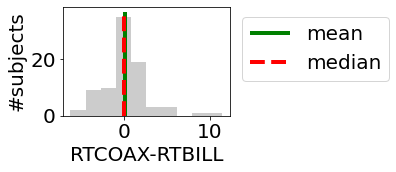

In [50]:
plt.figure(1,figsize =(3,2))
plt.hist(merged1['diff'],bins =10,color ='grey', alpha = .4)
plt.xlabel ('RTCOAX-RTBILL', fontsize =20)
plt.ylabel('#subjects', fontsize =20)
ymi,yma = plt.ylim()
plt.vlines(np.mean(merged1['diff']),ymi,yma,label = 'mean', ls = 'solid',color = 'g', linewidth = 4)
plt.vlines(np.median(merged1['diff']),ymi,yma,label = 'median', ls = 'dashed', color = 'r', linewidth =4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=[1.01,1])
print(stats.normaltest(merged1['diff'])) # the difference is not normally distrbuted around zero.
stats.wilcoxon(merged1['diff'])

In [53]:
merged1['diff'].values.shape

(83,)

In [ ]:
#pop_response = ['left','right','left']
#movie_inds = [0,1,6]
#for i in range(3):
#    print(dat_all.loc[(dat_all['movie_ind']==movie_inds[i])&(dat_all['respDur_keys']==pop_response[i]),'respDur_rt'].median(skipna=True))

In [60]:
# extracts RTs and stores them in a list - 1 index for RTs for a movie
rtDur_all = []
for movies in range(10):
    rows = dat_all['movie_ind'] == movies
    rtDur_all.append(dat_all.loc[rows,'respDur_rt'].values) # each list element is an array of during-RTs
print('len(rtDur_all):', len(rtDur_all),', rtDur_all[0].shape', rtDur_all[0].shape)

len(rtDur_all): 10 , rtDur_all[0].shape (86,)


#### Raincloud plots

In [61]:
red_rgb*1.2

array([0.88470588, 0.28705882, 0.29176471])

In [38]:
colors = [red_rgb,blue_rgb]
# Set your custom color palette
myPalette = sns.set_palette(sns.color_palette(colors))

In [39]:
#pip install ptitprince

import ptitprince as pt

In [40]:
import warnings
warnings.filterwarnings("ignore", message='single_var_warning.format("Vertical",x")')

### two ways of plotting

In [41]:
def box_plot(data, edge_color, fill_color,pos,v):
    # customize boxplots
    alpha= .2
    bp = ax.boxplot(data, positions = [pos], patch_artist=True,widths=.3,vert=v,flierprops = dict(markeredgecolor=edge_color,
    markerfacecolor=fill_color, alpha=alpha))
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for element in ['medians']:
        plt.setp(bp[element], color='k',linewidth=2,ls='dashed')

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color,alpha=alpha)#'w'       
        
    return bp

In [42]:
dat_all.groupby(['movie','respDur_keys']).count().unstack(level=-1).sub_ind

respDur_keys,left,right
movie,,
BILLIARDA1,1.0,87.0
COAXINGB0,86.0,NaN
DRIFTINGA2,NaN,89.0
FISHING3,80.0,2.0
RANDOMMECH4,6.0,66.0
SCARING5,72.0,1.0
SEDUCINGB6,89.0,NaN
STARA7,2.0,82.0
SURPRISINGB8,83.0,1.0


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

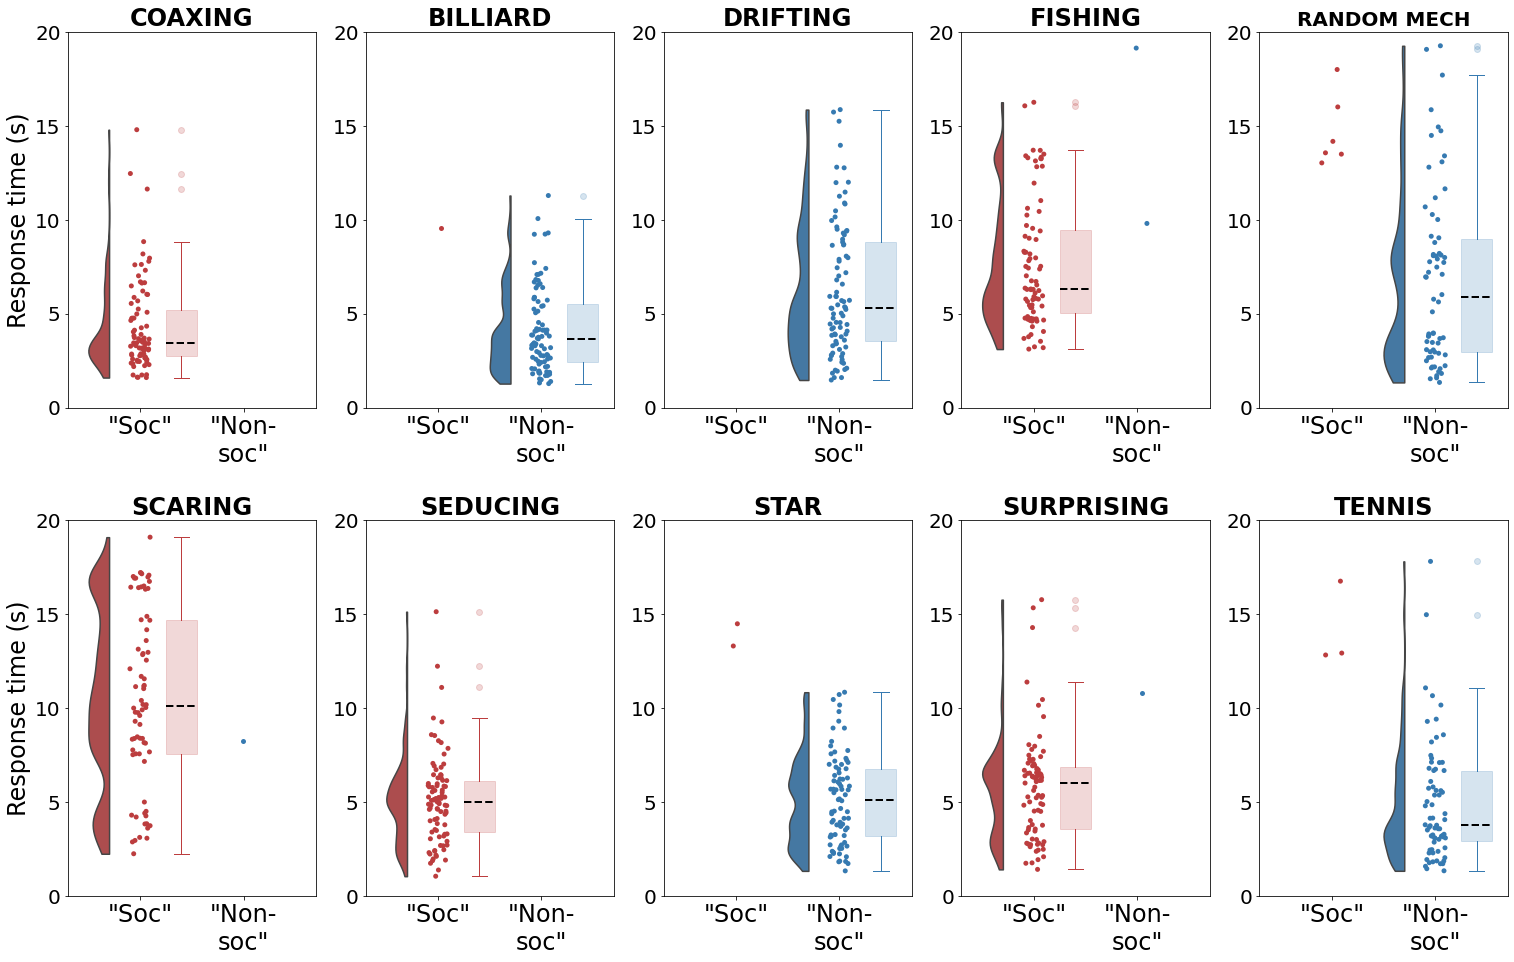

In [51]:
#same thing with a single command: now x **must** be the categorical value
m=0
df = dat_all.loc[dat_all['movie'] == movie_names[m],:]

dx = "respDur_keys"; dy = "respDur_rt"; ort = "v"; pal = myPalette; sigma = .2
f, ax = plt.subplots(figsize=(20, 15))
order = ['left','right']

boxplot_lims = [.4,1.4]
for m in range(10):
    plt.subplot(2,5,m+1)
    df = dat_all.loc[dat_all['movie']==movie_names[m],:]
    ax= pt.stripplot( y = dy, x = dx, data = df, palette = pal, edgecolor = "white",size = 3, jitter = True, zorder = 0, orient = ort,marker='.',s=10,order=order,move=0)
    if m ==4:
        plt.title('RANDOM MECH',fontweight='bold')
    else:
        plt.title(str.upper(vid_names_hcp[m].split('-')[0]),fontweight='bold',fontsize=24)
    #for i,resp in enumerate(['left','right']):
    for i,resp in enumerate(['left','right']):
        df2 = dat_all.loc[(dat_all['movie']==movie_names[m])&(dat_all['respDur_keys']==resp),:]
        keys_binary = [boxplot_lims[0] if i == 'left' else boxplot_lims[1] for i in df2['respDur_keys'].values]
        df2['keysDur_binary'] = keys_binary
        #df2['respDur_keys_binary'] = df2['respDur_keys'].map({'left': .5, 'right': 1.5})
        if df2.shape[0]>10:
            ax=pt.half_violinplot( y = dy, x = dx, data =df2, palette = pal, bw = .2, cut = 0.,
                                scale = "area", width = .4, inner = None, orient = ort,order=order,dodge=True,offset=.3)
            #ax=sns.boxplot( x = dx, y = dy, data = df2, color = "black", width = .1, zorder = 10,\
            #            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            #            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
            #            saturation = 1, orient = ort,order=order,dodge=True)

            color =  red_rgb if df2['keysDur_binary'].values[0] == boxplot_lims[0] else blue_rgb
            bp = box_plot(df2[dy], color, color,df2['keysDur_binary'].values[0],True)

            #ax = plt.boxplot(, positions= [df2['keysDur_binary'].values[0]])
            

    plt.xlabel('')
    plt.xticks(range(2),['"Soc"','"Non-\nsoc"'], fontsize=24,ha='center')
    plt.xlim(-.7,1.7)
    if m%5==0:
        plt.ylabel('Response time (s)',fontsize=24)
    else:
        plt.ylabel(' ')
    plt.ylim(0,20)
    plt.yticks([0,5,10,15,20])

plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)
#plt.tight_layout()

plt.savefig(os.path.join(fig_save_loc,'fig1S_RTduring.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


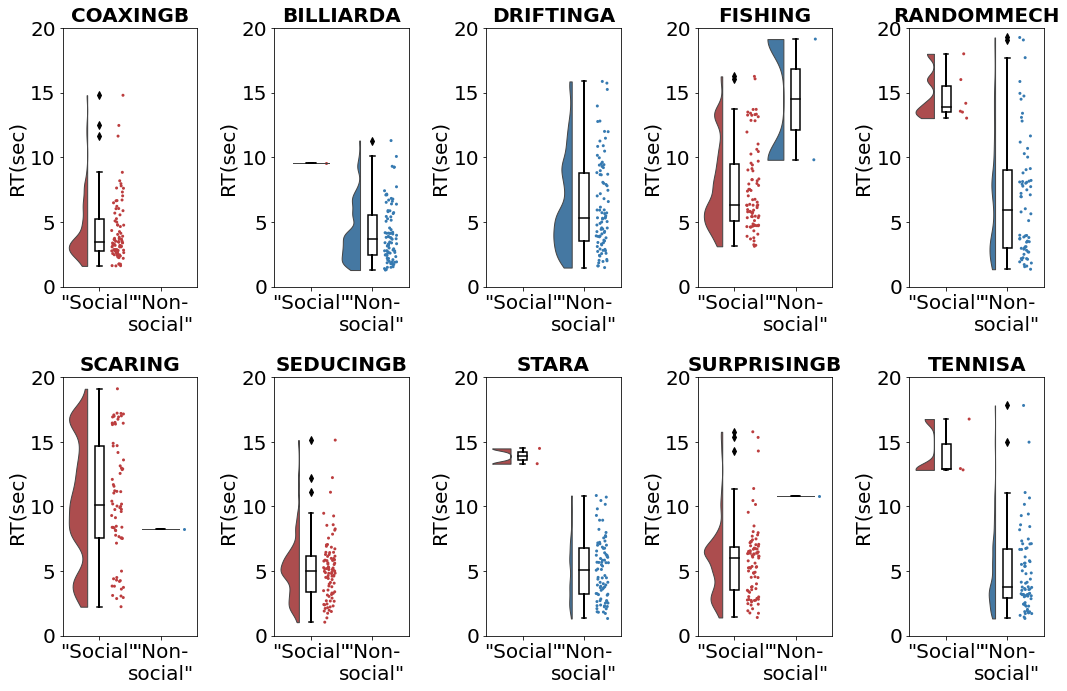

In [100]:
#same thing with a single command: now x **must** be the categorical value
#f, ax = plt.subplots(figsize=(7, 5))
plt.figure(1,figsize=(15,10))
m=6
for m in range(10):
    plt.subplot(2,5,m+1)
    df = dat_all.loc[(dat_all['movie'] == movie_names[m]),:]
    dx = df["respDur_keys"]; dy = df["respDur_rt"]; ort = "v"; pal = myPalette; sigma = .2
    #if m in [0,3,5,6,8]:
    #    pal = "RdBu"
    #else:
    #    pal = "RdBu_r"
    ax=plt.gcf().axes[m]
    pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,width_viol = .6, ax = ax, orient = ort,move = .3,order=['left','right'])
    #pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,\
    #                width_viol = .6, ax = plt.gcf().axes[m], orient = ort,move = .3)
    plt.xlabel('')
    #if m in [0,3,5,6,8]:
    plt.xticks(range(2),['"Social"','"Non-\nsocial"'])
    #else:
    #    plt.yticks(range(2),['"Non-\nsocial"','"Social"'])
    plt.ylabel('RT(sec)')
    plt.title(movie_names[m][:-1],fontweight='bold')
    
    plt.ylim(0,20)
    plt.xlim(-.6,1.6)
    
plt.tight_layout()

### other visualizations of RT

NameError: name 'rtDur_all' is not defined

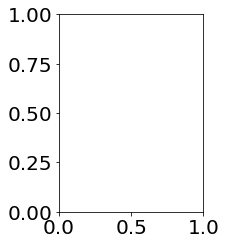

In [43]:
plt.figure(1,figsize = (15,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    val = rtDur_all[i]
    #plt.errorbar(i+1,np.nanmean(val),stats.sem(val, nan_policy = 'omit'),marker = 'o')
    #plt.plot(np.ones((len(val))),val, marker = 'o', ls = 'None')
    #sns.violinplot(val)
    s =  dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1).iloc[i,0]
    ns =  dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1).iloc[i,1]
    s = 0 if np.isnan(s) else s
    ns = 0 if np.isnan(ns) else ns
    plt.hist(val,bins=20, color = [0,0,.95],alpha = .5)
    #plt.title(movie_names[i] + ',n=' + str(nsubs[i])+ '\nnSoc='+ str(s) + ',nRand=' + str(ns))
    plt.title(movie_names[i] + '\nnSoc='+ str(s) + ',\nnRand=' + str(ns),fontweight = 'bold',fontsize =20)
    plt.vlines(np.mean(val),0,20,color = 'r', linewidth = 2, ls = 'dotted', label = 'mean')
    plt.vlines(np.median(val),0,20,color = 'g', linewidth = 2, ls = 'dotted', label = 'median')
    plt.xticks([0,5,10,15,20],fontsize =20)
    if i % 5 ==0:
        plt.yticks(fontsize =20)
        plt.ylabel('#subs')
    else:
        plt.yticks([])
    if i>4:
        plt.xlabel('RT(s)',fontsize =20)
    plt.ylim(0,20)
    if i ==4:
        plt.legend(bbox_to_anchor=(1.2, 1), loc = 'upper left',fontsize=20)
    
plt.tight_layout()
#lbls = [str.upper(i[:4]) for i in movie_names]
#plt.xticks(1+np.arange(10),lbls)

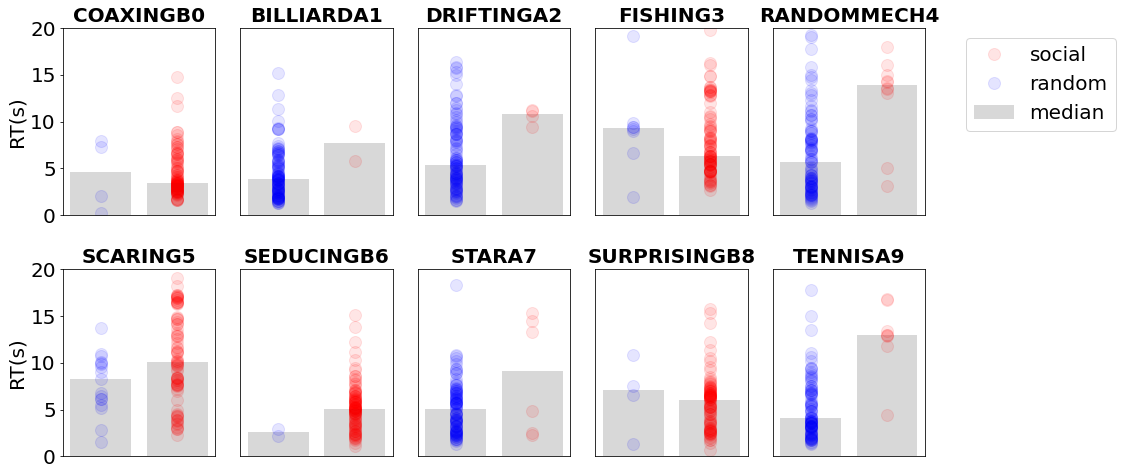

In [44]:
# visualizing RTs per group as dots
plt.figure(1,figsize =(16,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    dat_movie = dat_all.loc[dat_all['movie_ind']==i]
        
    # extracts RTs and stores them in a list - 1 index for RTs for a movie
    rows = (dat_all['movie_ind'] == i) & (dat_all['respDur_keys'] == 'left') 
    val1 = dat_all.loc[rows,'respDur_rt'].values
    val1 = val1[~np.isnan(val1)]
    
    rows = (dat_all['movie_ind'] == i) & (dat_all['respDur_keys'] == 'right') 
    val2 = dat_all.loc[rows,'respDur_rt'].values
    val2 = val2[~np.isnan(val2)]
    
    plt.plot(np.ones((len(val1),))+.5,val1, color = 'red', ls = 'None',marker = 'o', markersize =12, alpha = .1, label = 'social')
    plt.plot(np.ones((len(val2),))-.5,val2, color = 'blue', ls = 'None',marker = 'o', markersize =12,alpha = .1, label = 'random')
    plt.bar([.5,1.5], [np.nanmedian(val2),np.nanmedian(val1)], color = 'grey', alpha = .3, label = 'median')
    #plt.hlines(0,0,2,color = 'k')
    if i ==4:
        plt.legend(bbox_to_anchor=(1.2, 1), loc = 'upper left',fontsize =20)
    plt.title(movie_names[i], fontweight = 'bold', fontsize =20)
    plt.xticks([])
    if i% 5 == 0:
        plt.yticks(fontsize=20)
        plt.ylabel('RT(s)',fontsize =20)
    else:
        plt.yticks([])
    plt.xlim(0,2)
    plt.ylim(0,20)
    plt.xlabel('')
    #lbls = [str.upper(i[:4]) for i in movie_names]
    #plt.xticks(np.arange(10),lbls, rotation = 30)
plt.tight_layout()

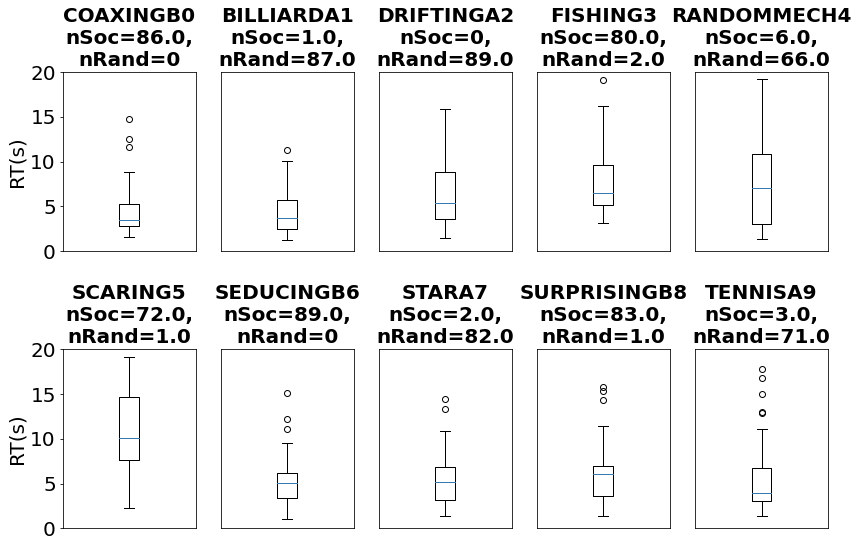

In [52]:
plt.figure(1,figsize = (12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    val = rtDur_all[i]
    #plt.errorbar(i+1,np.nanmean(val),stats.sem(val, nan_policy = 'omit'),marker = 'o')
    #plt.plot(np.ones((len(val))),val, marker = 'o', ls = 'None')
    #sns.violinplot(val)
    val = val[~np.isnan(val)]
    plt.boxplot(val, notch = False)
    s =  dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1).iloc[i,0]
    ns =  dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1).iloc[i,1]
    s = 0 if np.isnan(s) else s
    ns = 0 if np.isnan(ns) else ns
    plt.title(movie_names[i] + '\nnSoc='+ str(s) + ',\nnRand=' + str(ns),fontsize = 20,fontweight = 'bold')
    plt.xticks([])
    if i%5 ==0 :
        plt.yticks(fontsize =20)
        plt.ylabel('RT(s)', fontsize =20)
    else:
        plt.yticks([])
    plt.ylim(0,20)
plt.tight_layout()
#lbls = [str.upper(i[:4]) for i in movie_names]
#plt.xticks(1+np.arange(10),lbls)

## Comparing distrbutions

In [53]:
['_'+ mnames[0][:4],'_'+ mnames[1][:4],'_'+ mnames[2][:4]]

NameError: name 'mnames' is not defined

In [63]:
# for the fmri analysis
print('median RT, social:', merged2['respDur_rt_SEDU'].median())
print('median RT, random:', merged2['respDur_rt_BILL'].median())

median RT, social: 4.996650000000001
median RT, random: 3.6813000000000002


In [20]:
movie_inds = [0,1] # CHANGE MOVIE INDEX HERE
mnames = [movie_names[i] for i in movie_inds]
print(mnames)
df1 = dat_all.loc[(dat_all['movie']== mnames[0]) & (dat_all['respDur_keys']== 'left'),:]#['participant','respDur_rt']]
df2 = dat_all.loc[(dat_all['movie']== mnames[1]) & (dat_all['respDur_keys']== 'right'),:]#  ['participant','respDur_rt']]


['COAXINGB0', 'BILLIARDA1']


In [79]:
ind = df2.sub_ind.isin(df1.sub_ind) & df1.sub_ind.isin(df2.sub_ind)
merged = pd.merge(df1, df2, how='inner', on=['sub_ind'],suffixes = ['_'+ mnames[0][:4],'_'+ mnames[1][:4]])

merged['diff'] = merged['respDur_rt_COAX'] -  merged['respDur_rt_BILL']

merged # list of subs who gave a "social" response for movie 1 and "nonsocial" response for movie 2


['COAXINGB0', 'BILLIARDA1']


,sub_ind,Unnamed: 0_COAX,respDur_keys_COAX,respDur_rt_COAX,respAfter_keys_COAX,respAfter_rt_COAX,movie_COAX,date_COAX,movie_ind_COAX,consistency_COAX,Unnamed: 0_BILL,respDur_keys_BILL,respDur_rt_BILL,respAfter_keys_BILL,respAfter_rt_BILL,movie_BILL,date_BILL,movie_ind_BILL,consistency_BILL,diff
0,86.0,0,left,3.070585,left,0.86851,COAXINGB0,2021-07-25_08h39.36.916,0.0,1.0,1,right,1.90983,right,0.669700,BILLIARDA1,2021-07-25_08h39.36.916,1.0,1.0,1.160755
1,39.0,30,left,3.072100,left,0.31040,COAXINGB0,2021-07-25_14h37.25.903,0.0,1.0,31,right,1.48970,right,0.238900,BILLIARDA1,2021-07-25_14h37.25.903,1.0,1.0,1.582400
2,47.0,40,left,2.865100,left,0.62790,COAXINGB0,2021-07-25_14h54.05.867,0.0,1.0,41,right,2.78050,right,1.091000,BILLIARDA1,2021-07-25_14h54.05.867,1.0,1.0,0.084600
3,31.0,50,left,3.453340,left,1.26579,COAXINGB0,2021-07-25_08h52.20.361,0.0,1.0,51,right,2.67928,right,0.700595,BILLIARDA1,2021-07-25_08h52.20.361,1.0,1.0,0.774060
4,27.0,60,left,3.371800,left,1.36510,COAXINGB0,2021-07-25_09h36.55.282,0.0,1.0,61,right,2.98620,right,1.105000,BILLIARDA1,2021-07-25_09h36.55.282,1.0,1.0,0.385600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,32.0,960,left,3.379000,left,0.60300,COAXINGB0,2021-07-25_06h52.13.337,0.0,1.0,961,right,3.69900,right,0.536000,BILLIARDA1,2021-07-25_06h52.13.337,1.0,1.0,-0.320000
79,14.0,970,left,5.250400,left,1.00100,COAXINGB0,2021-07-25_09h51.36.290,0.0,1.0,971,right,5.72450,right,1.035600,BILLIARDA1,2021-07-25_09h51.36.290,1.0,1.0,-0.474100
80,78.0,980,left,4.643200,left,0.38530,COAXINGB0,2021-07-25_14h55.23.086,0.0,1.0,981,right,4.06800,right,0.416900,BILLIARDA1,2021-07-25_14h55.23.086,1.0,1.0,0.575200
81,9.0,990,left,8.183700,left,2.36050,COAXINGB0,2021-07-25_14h57.00.228,0.0,1.0,991,right,7.15560,right,1.811000,BILLIARDA1,2021-07-25_14h57.00.228,1.0,1.0,1.028100


NormaltestResult(statistic=25.988950807317465, pvalue=2.272851372105547e-06)


WilcoxonResult(statistic=1619.0, pvalue=0.5734507851511437)

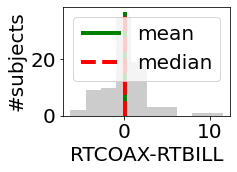

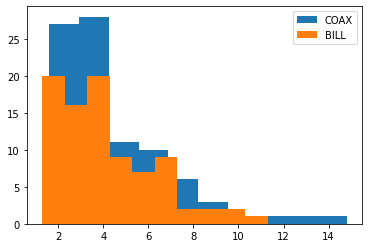

In [62]:
plt.hist(merged['respDur_rt_COAX'], label = 'COAX')
plt.hist(merged['respDur_rt_BILL'], label = 'BILL')
plt.legend()


NormaltestResult(statistic=5.633326554651264, pvalue=0.05980516339675759) mean diff: 1.0054784066043954


Ttest_1sampResult(statistic=4.047214495447447, pvalue=0.00010943915132574506)

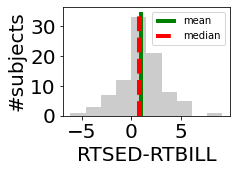

In [70]:
plt.figure(1,figsize =(3,2))
plt.hist(merged['diff'],bins =10,color = 'grey',alpha = .4)
plt.xlabel ('RTSED-RTBILL', fontsize =20)
plt.ylabel('#subjects', fontsize =20)
ymi,yma = plt.ylim()
plt.vlines(np.mean(merged['diff']),ymi,yma,label = 'mean', ls = 'solid',color = 'g', linewidth = 4)
plt.vlines(np.median(merged['diff']),ymi,yma,label = 'median', ls = 'dashed', color = 'r', linewidth =4)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
print(stats.normaltest(merged['diff']),'mean diff:',np.mean(merged['diff'])) # the difference is not normally distrbuted around zero.
stats.ttest_1samp(merged['diff'],0)

In [ ]:
plt.hist(merged['respDur_rt_SEDU'], label = 'SEDU')
plt.hist(merged['respDur_rt_BILL'], label = 'BILL')
plt.legend()

## Extra code

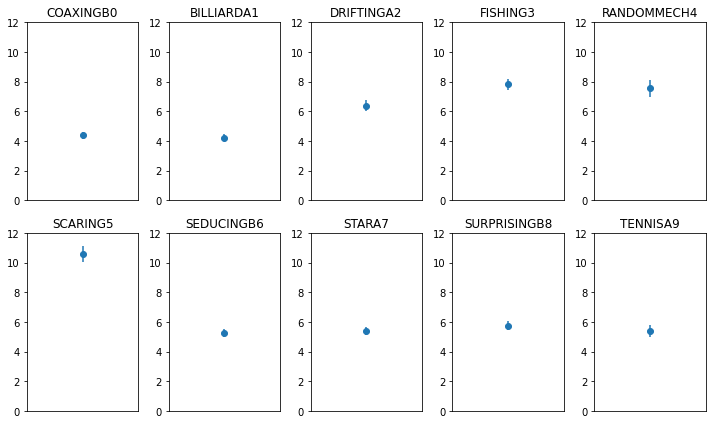

In [99]:
plt.figure(1,figsize = (10,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    val = rtDur_all[i]
    plt.errorbar(i+1,np.nanmean(val),stats.sem(val, nan_policy = 'omit'),marker = 'o')
    plt.title(movie_names[i])
    plt.xticks([])
    plt.ylim(0,12)
plt.tight_layout()
#lbls = [str.upper(i[:4]) for i in movie_names]
#plt.xticks(1+np.arange(10),lbls)

In [60]:
# check if this is correct
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m = np.mean(a)
    se = stats.sem(a)
    h = se * stats.t._ppf((1+confidence)/2., n-1)
    return m,h 

In [134]:
from scipy.stats import t

t_bounds = t.interval(0.999, len(val) - 1)
t_bounds

(-3.417985096707854, 3.4179850967078886)

<ipython-input-228-8934cd2f9f84>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-228-8934cd2f9f84>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


KstestResult(statistic=0.15053763440860216, pvalue=0.24350006240630304)

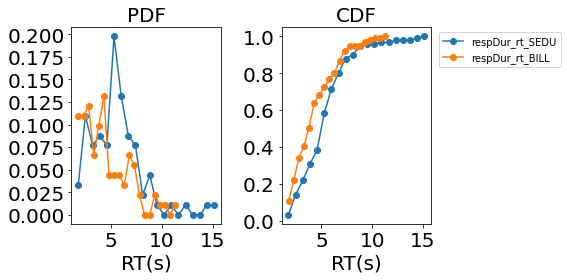

In [228]:
def cum_plot(data1,data2,lbls = ['data1','data2']):
    
    
    for i,data in enumerate([data1,data2]):
        # getting data of the histogram
        count, bins_count = np.histogram(data, bins=20)

        # finding the PDF of the histogram using count values
        pdf = count / sum(count)

        # using numpy np.cumsum to calculate the CDF
        # We can also find using the PDF values by looping and adding
        cdf = np.cumsum(pdf)

        # plotting PDF and CDF
        plt.figure(1,figsize =(8,4))
        plt.subplot(1,2,1)
        plt.title('PDF',fontsize =20)
        plt.plot(bins_count[1:], pdf,label=lbls[i],marker ='o')
        plt.xlabel('RT(s)',fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        #plt.legend()
        
        plt.subplot(1,2,2)
        plt.title('CDF',fontsize =20)
        plt.plot(bins_count[1:], cdf, label=lbls[i],marker ='o')
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.xlabel('RT(s)',fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
    plt.tight_layout()

cum_plot(merged[merged.columns[-3]],merged[merged.columns[-2]],[merged.columns[-3],merged.columns[-2]])

from scipy.stats import ks_2samp
ks_2samp(mat1,mat2)

- distributions not sig different, but these are from the same subs whereas K-S assumes independent samples